# 선형 회귀 (Linear Regression)

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### [dataset] 보스턴 집값 예측 데이터 
각 데이터베이스의 레코드는 보스턴 교외 또는 마을을 설명한다.

이 데이터는 1970년 보스턴 표준 도시 통계 지역(SMSA)에서 수집되었다. (UCI ML Repository에서 발췌):

- CRIM: 마을별 1인당 범죄율
- ZN: 25,000 평방피트를 초과하는 주거용 토지 비율
- INDUS: 비소매 업종이 차지하는 마을별 비율
- CHAS: 찰스강 더미 변수 (강과 인접한 지역이면 1, 아니면 0)
- NOX: 질소 산화물 농도 (1,000만분의 1 단위)
- RM: 주택당 평균 방 개수
- AGE: 1940년 이전에 지어진 자가 소유 주택 비율
- DIS: 보스턴 고용 센터 5곳까지의 가중 거리
- RAD: 방사형 고속도로 접근성 지수
- TAX: \$10,000당 전체 재산세율
- PTRATIO: 마을별 학생-교사 비율
- B: $1000(Bk−0.63)^2$ (여기서 Bk는 마을별 흑인 비율)
- LSTAT: 저소득층 인구 비율
- MEDV: (타겟) Median House Value 자가 소유 주택의 중앙값 (단위: \$1000s)

In [67]:
boston_df = pd.read_csv('./data/boston_housing_train.csv')
boston_df.info()
boston_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


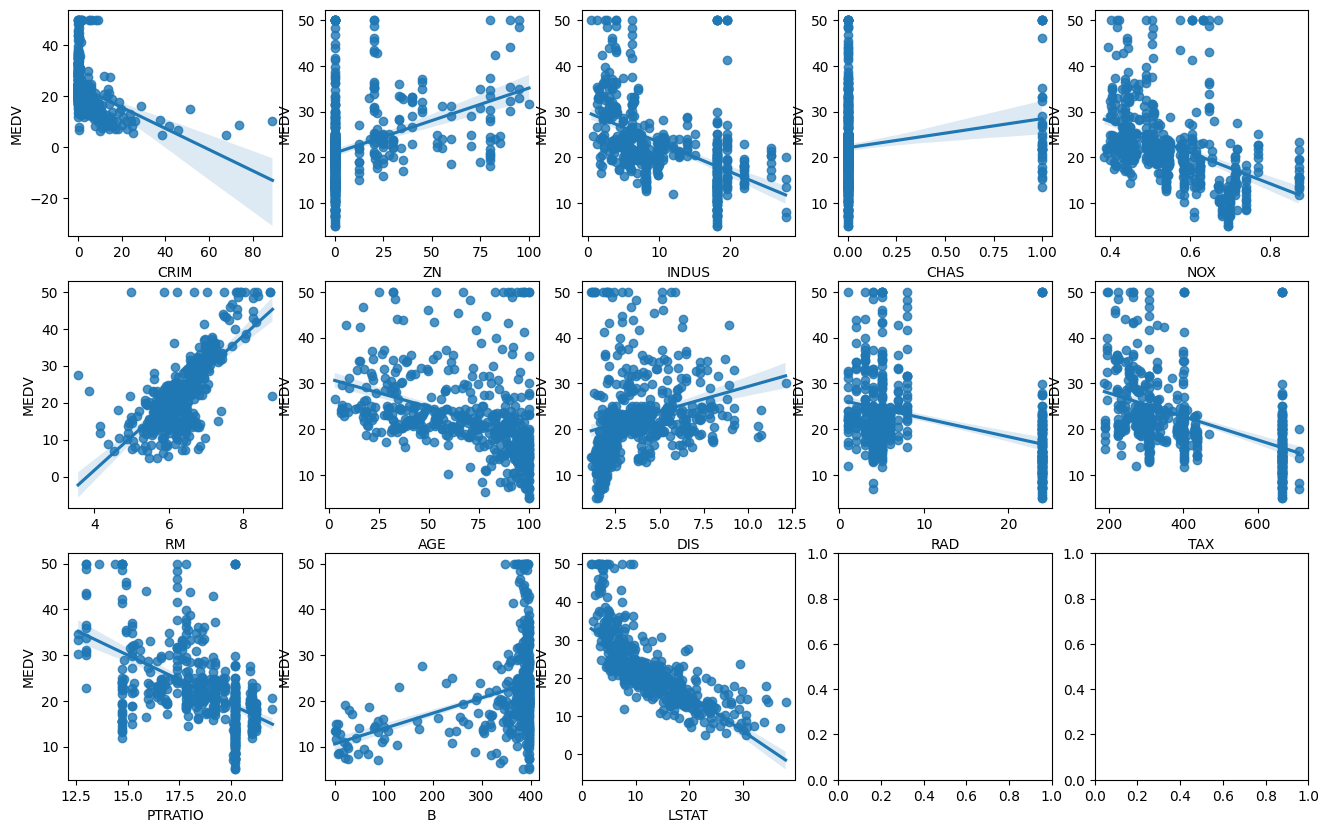

In [68]:
# Feature-Label 관계 시각화
fig, ax = plt.subplots(figsize=(16, 10), ncols=5, nrows=3)

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

for i, col_name in enumerate(columns):
    row = i // 5
    col = i % 5
    ax_temp = ax[row][col]

    # sns.scatterplot(data=boston_df, x=col_name, y='MEDV', ax=ax_temp)
    sns.regplot(data=boston_df, x=col_name, y='MEDV', ax=ax_temp)

### 다중회귀

In [69]:
from sklearn.model_selection import train_test_split

X = boston_df.drop('MEDV', axis=1)
y = boston_df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [70]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [71]:
print(boston_df.columns)
lr.coef_, lr.intercept_

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


(array([-1.28322638e-01,  2.95517751e-02,  4.88590934e-02,  2.77350326e+00,
        -1.62388292e+01,  4.36875476e+00, -9.24808158e-03, -1.40086668e+00,
         2.57761243e-01, -9.95694820e-03, -9.23122944e-01,  1.31854199e-02,
        -5.17639519e-01]),
 np.float64(29.83642016383845))

In [72]:
# 회귀모델 score()의 기본 평가 지표 == R^2 score (결정계수)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.748087259862344, 0.684426728352709)

##### 회귀분석 평가 지표

In [73]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse} | RMSE: {rmse} | MAE: {mae} | R2score: {r2}')

MSE: 22.09869482709827 | RMSE: 4.700924890603791 | MAE: 3.0609395954370795 | R2score: 0.684426728352709


### 다항회귀

- 회귀식이 선형이 아닌 2차, 3차 방정식으로 표현되는 회귀 기법

In [74]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False, degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print(X_train_poly.shape)
poly.get_feature_names_out()

(379, 104)


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'CRIM^2', 'CRIM ZN', 'CRIM INDUS',
       'CRIM CHAS', 'CRIM NOX', 'CRIM RM', 'CRIM AGE', 'CRIM DIS',
       'CRIM RAD', 'CRIM TAX', 'CRIM PTRATIO', 'CRIM B', 'CRIM LSTAT',
       'ZN^2', 'ZN INDUS', 'ZN CHAS', 'ZN NOX', 'ZN RM', 'ZN AGE',
       'ZN DIS', 'ZN RAD', 'ZN TAX', 'ZN PTRATIO', 'ZN B', 'ZN LSTAT',
       'INDUS^2', 'INDUS CHAS', 'INDUS NOX', 'INDUS RM', 'INDUS AGE',
       'INDUS DIS', 'INDUS RAD', 'INDUS TAX', 'INDUS PTRATIO', 'INDUS B',
       'INDUS LSTAT', 'CHAS^2', 'CHAS NOX', 'CHAS RM', 'CHAS AGE',
       'CHAS DIS', 'CHAS RAD', 'CHAS TAX', 'CHAS PTRATIO', 'CHAS B',
       'CHAS LSTAT', 'NOX^2', 'NOX RM', 'NOX AGE', 'NOX DIS', 'NOX RAD',
       'NOX TAX', 'NOX PTRATIO', 'NOX B', 'NOX LSTAT', 'RM^2', 'RM AGE',
       'RM DIS', 'RM RAD', 'RM TAX', 'RM PTRATIO', 'RM B', 'RM LSTAT',
       'AGE^2', 'AGE DIS', 'AGE RAD', 'AGE TAX', 'AGE PTRATIO', 'AGE B',
       '

In [ ]:
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

y_pred_poly = lr_poly.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred_poly)
rmse = root_mean_squared_error(y_test, y_pred_poly)
mae = mean_absolute_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)

print(f'MSE: {mse} | RMSE: {rmse} | MAE: {mae} | R2score: {r2}')
print(lr_poly.score(X_train_poly, y_train), lr_poly.score(X_test_poly, y_test))

MSE: 15.69743582712957 | RMSE: 3.961998968592694 | MAE: 2.583196774476 | R2score: 0.7758378393294851
0.9448313975211593 0.7758378393294851


##### [참고] 과대적합/과소적합 
https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

### [한번 해보기] 캘리포니아 집값 예측 해보기

**California Housing Dataset**는 머신러닝과 데이터 분석에서 자주 사용되는 데이터셋으로, 1990년 미국 캘리포니아 주의 인구 조사를 기반으로 수집된 주택 관련 데이터이다. 이 데이터셋은 캘리포니아 내의 블록 그룹(block group)을 나타내며, 각 레코드는 하나의 블록 그룹을 의미한다. 블록 그룹은 미국 인구 조사국에서 표본 데이터를 제공하는 가장 작은 지리적 단위이다.
- 데이터셋은 **20,640개의 레코드**로 구성되어 있다.
- **회귀 모델링**: 주택 가격 예측.
- **탐색적 데이터 분석(EDA)**: 주택 특징 간의 관계 분석.
- **특징 엔지니어링 및 선택**: 영향력 있는 특징 도출.


**특징**

1. **MedInc**: 블록 그룹 내의 중간 소득 (단위: 만 달러).
2. **HouseAge**: 블록 그룹 내의 중간 주택 연수.
3. **AveRooms**: 블록 그룹 내 가구당 평균 방 수.
4. **AveBedrms**: 블록 그룹 내 가구당 평균 침실 수.
5. **Population**: 블록 그룹 내 인구 수.
6. **AveOccup**: 블록 그룹 내 가구당 평균 거주자 수.
7. **Latitude**: 블록 그룹의 위도.
8. **Longitude**: 블록 그룹의 경도.

**목표 변수**

- **MedHouseVal**: 블록 그룹 내 가구의 중간 주택 가치 (단위: 만 달러).


In [76]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

# 평가지표 계산 및 출력하는 함수 정의
def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f'MSE: {mse} | RMSE: {rmse} | MAE: {mae} | R2score: {r2}')

In [77]:
from sklearn.datasets import fetch_california_housing

california_ds = fetch_california_housing()
california_ds.keys()

# print(california_ds.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

##### 1. DataFrame 생성 -> 구조/기초 통계(요약) 확인

In [78]:
california_df = pd.DataFrame(data=california_ds.data, columns=california_ds.feature_names)
california_df[california_ds.target_names[0]] = california_ds.target

california_df.info()
california_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


##### 2. 시각화 -> 특성 확인 (hint: 위에서 했음)

In [79]:
california_ds.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

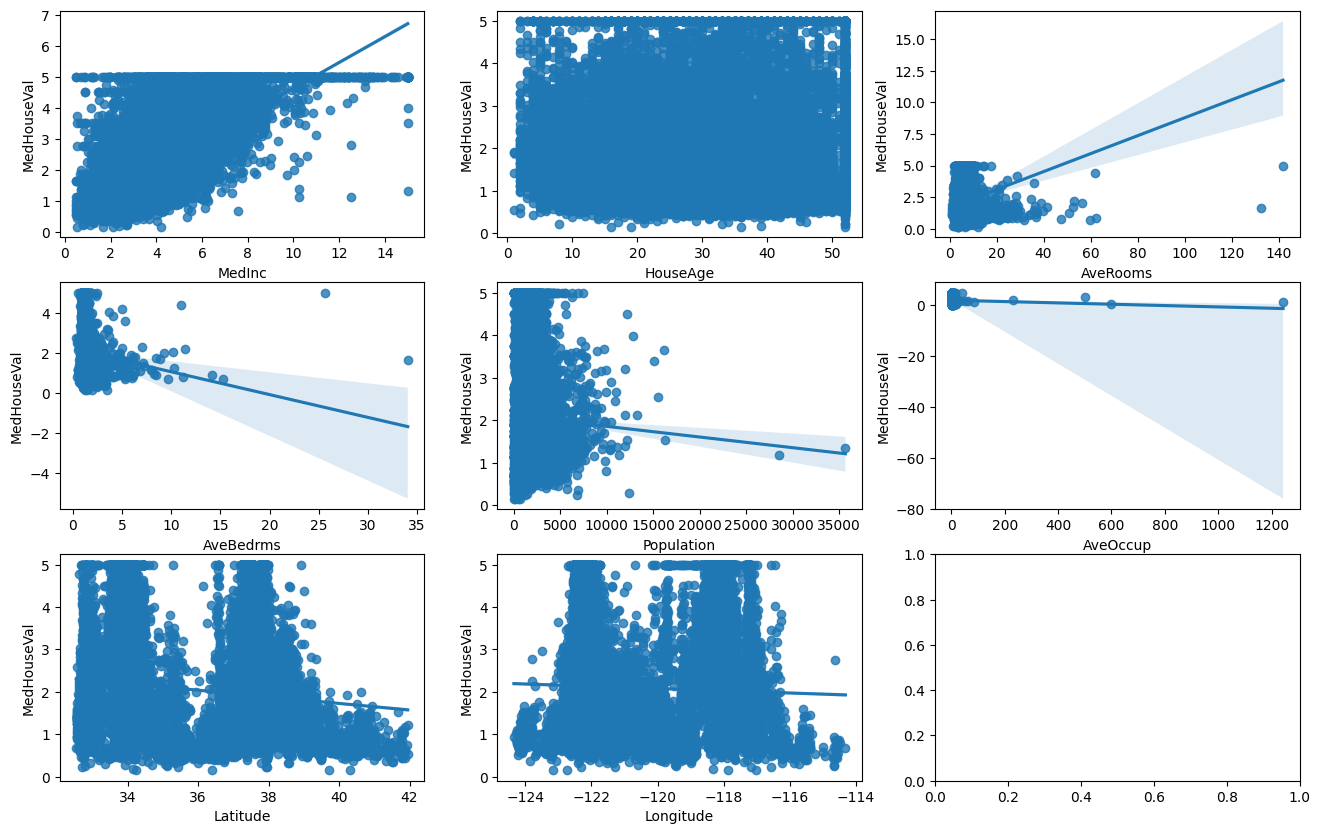

In [80]:
fig, ax = plt.subplots(figsize=(16, 10), ncols=3, nrows=3)

columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

for i, col_name in enumerate(columns):
    row = i // 3
    col = i % 3
    ax_temp = ax[row][col]
   
    sns.regplot(data=california_df, x=col_name, y='MedHouseVal', ax=ax_temp)

##### 3. 다중회귀 (학습-평가-MSE/RMSE/MAE/R2score까지 확인)

In [81]:
X = california_ds.data
y = california_ds.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [82]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.609873031052925 0.5910509795491351


In [83]:
evaluate_regression(y_test, lr.predict(X_test))

MSE: 0.5411287478470689 | RMSE: 0.7356145375446769 | MAE: 0.5296964012919744 | R2score: 0.5910509795491351


##### 4. 다항회귀 (학습-평가-MSE/RMSE/MAE/R2score까지 확인)

In [84]:
poly = PolynomialFeatures(include_bias=False, degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [85]:
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

print(lr.score(X_train_poly, y_train), lr.score(X_test_poly, y_test))

0.6829089327528398 0.6563005879298475


In [86]:
evaluate_regression(y_test, lr.predict(X_test_poly))

MSE: 0.45478928469921964 | RMSE: 0.6743806675010929 | MAE: 0.4646020777049507 | R2score: 0.6563005879298475


In [87]:
from sklearn.pipeline import Pipeline

p_model = Pipeline([
    # (이름, 객체)
    ('poly', PolynomialFeatures(include_bias=False, degree=2)),
    ('lr', LinearRegression()),
])

# 학습
p_model.fit(X_train, y_train)

# 평가
print(p_model.score(X_test, y_test))

# 예측
y_pred = p_model.predict(X_test)
evaluate_regression(y_test, y_pred)

0.6563005879298475
MSE: 0.45478928469921964 | RMSE: 0.6743806675010929 | MAE: 0.4646020777049507 | R2score: 0.6563005879298475


In [88]:
p_model_lr = p_model.named_steps['lr']
p_model_lr.coef_, p_model_lr.intercept_

(array([-1.18149889e+01, -8.49101205e-01,  7.93341506e+00, -3.90263703e+01,
        -4.90164991e-04,  1.03727716e+00,  8.27990514e+00,  5.74137596e+00,
        -3.05936096e-02,  1.59801803e-03,  3.86922837e-02, -1.38726408e-01,
         5.11408720e-05, -3.84501143e-03, -1.61733233e-01, -1.51724214e-01,
         2.11029782e-04, -5.98080385e-04,  1.09081918e-02,  2.56573547e-06,
        -1.97181493e-03, -1.03455044e-02, -1.00661914e-02,  1.16865966e-02,
        -1.16437970e-01, -5.51721955e-05,  2.13589483e-02,  1.06985141e-01,
         1.00602280e-01,  2.88810791e-01,  4.88926279e-04, -8.65448374e-02,
        -5.40042730e-01, -4.96189957e-01,  1.42020540e-09,  2.44088253e-05,
         1.05046721e-05,  3.64069361e-06,  5.25946150e-05,  2.03788796e-02,
         1.58781028e-02,  5.80472939e-02,  1.01661358e-01,  3.81657320e-02]),
 np.float64(205.9539259931978))

In [89]:
p_model_poly = p_model.named_steps['poly']
type(p_model_poly)

sklearn.preprocessing._polynomial.PolynomialFeatures